In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 30.9 MB/s eta 0:00:00


In [2]:
import os
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Set dataset paths
train_dir = '/kaggle/input/emotion-dataset/train'
valid_dir = '/kaggle/input/emotion-dataset/valid'
test_dir = '/kaggle/input/emotion-dataset/test'
data_yaml = '/kaggle/input/emotion-dataset/data.yaml'


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


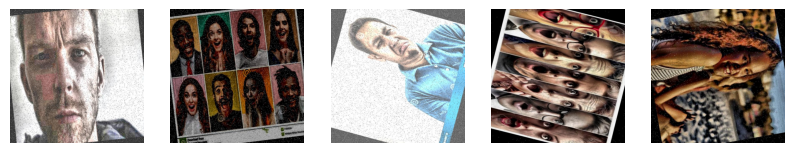

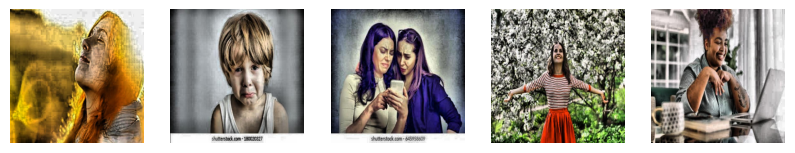

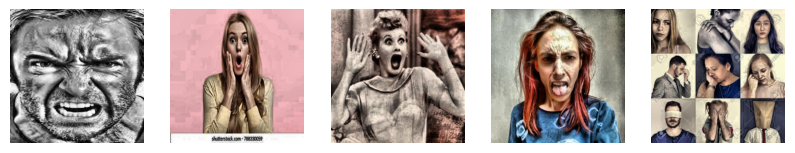

In [3]:
import cv2
import glob
import random

def show_random_images_from_dir(image_dir, num_images=5):
    image_files = glob.glob(f"{image_dir}/images/*.jpg")  # assuming jpg images
    random_images = random.sample(image_files, num_images)
    
    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(random_images):
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, idx + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
    plt.show()

# Display random images from train, valid, and test sets
show_random_images_from_dir(train_dir)
show_random_images_from_dir(valid_dir)
show_random_images_from_dir(test_dir)


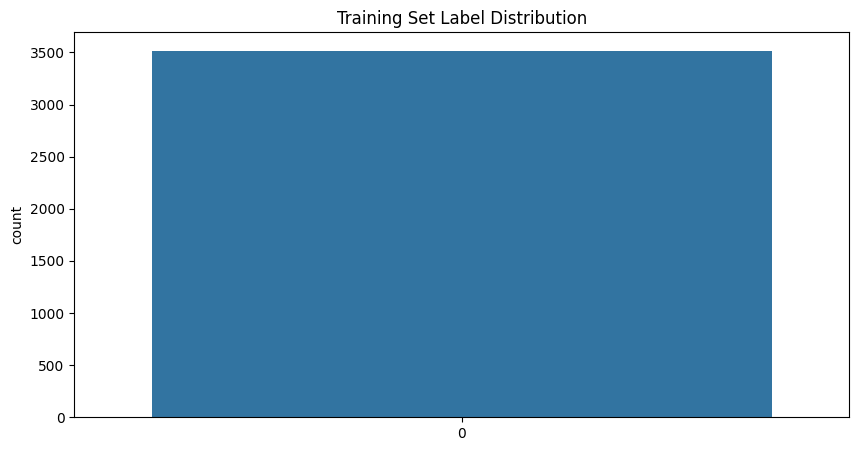

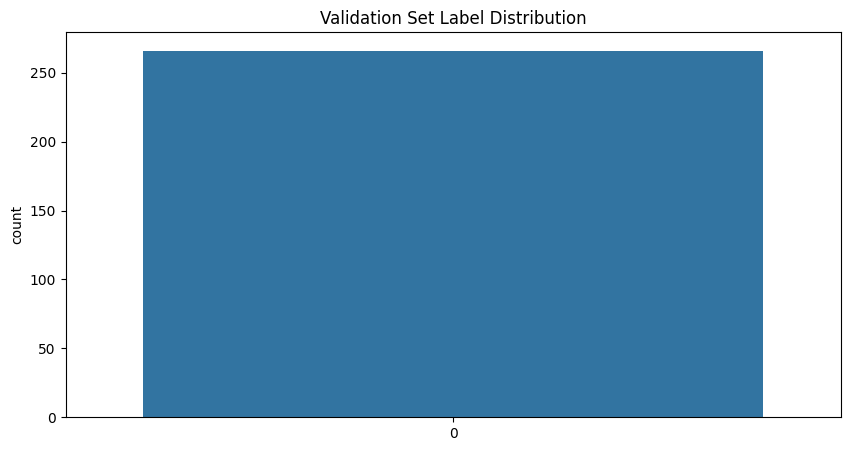

In [4]:
import pandas as pd
import seaborn as sns

# Read the .txt label files in YOLO format
def get_label_distribution(label_dir):
    label_files = glob.glob(f"{label_dir}/labels/*.txt")
    class_counts = []
    
    for label_file in label_files:
        with open(label_file, 'r') as file:
            lines = file.readlines()
            for line in lines:
                class_id = int(line.split()[0])
                class_counts.append(class_id)
                
    return pd.Series(class_counts)

# Plot distribution of labels for train and validation sets
train_labels = get_label_distribution(train_dir)
valid_labels = get_label_distribution(valid_dir)

plt.figure(figsize=(10, 5))
sns.countplot(train_labels)
plt.title('Training Set Label Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(valid_labels)
plt.title('Validation Set Label Distribution')
plt.show()


In [5]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # You can use 'yolov8n', 'yolov8s', etc.

# Train the model with specified data and hyperparameters
model.train(
    data=data_yaml,
    epochs=50,         # Number of training epochs
    imgsz=640,         # Image size
    batch=16,          # Batch size
    name='yolov8_emotion_detection'  # Experiment name
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 158MB/s]


Ultralytics 8.3.18 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/emotion-dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_emotion_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 37.2MB/s]
2024-10-19 21:48:16,714	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-19 21:48:17,279	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 171MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/emotion-dataset/train/labels... 1230 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1230/1230 [00:02<00:00, 455.39it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/emotion-dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/emotion-dataset/valid/labels... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<00:00, 432.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/emotion-dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8_emotion_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_emotion_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.54G      1.529      3.433      1.692         70        640: 100%|██████████| 77/77 [00:15<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        117        266      0.108      0.147      0.147     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.25G       1.47      2.834      1.641         53        640: 100%|██████████| 77/77 [00:13<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]


                   all        117        266      0.131      0.373       0.14     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.41G      1.476      2.684      1.611         68        640: 100%|██████████| 77/77 [00:13<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        117        266      0.138      0.357      0.138      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G      1.485      2.614      1.591        103        640: 100%|██████████| 77/77 [00:13<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        117        266      0.149      0.526      0.203      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.27G      1.453      2.501      1.572         83        640: 100%|██████████| 77/77 [00:13<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]


                   all        117        266       0.18      0.397      0.202      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.37G      1.449      2.455      1.556         54        640: 100%|██████████| 77/77 [00:13<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        117        266      0.145      0.473      0.194     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.36G      1.408      2.386      1.519         84        640: 100%|██████████| 77/77 [00:13<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]


                   all        117        266      0.174      0.519      0.252      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.28G      1.427      2.295      1.518         54        640: 100%|██████████| 77/77 [00:13<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        117        266      0.164      0.523      0.245      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.27G      1.363      2.241      1.503        107        640: 100%|██████████| 77/77 [00:13<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        117        266       0.25      0.447      0.284      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.32G      1.355      2.195      1.484         63        640: 100%|██████████| 77/77 [00:13<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        117        266      0.172      0.523      0.292      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.47G      1.344       2.12      1.469         84        640: 100%|██████████| 77/77 [00:13<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        117        266      0.202      0.495      0.279       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.34G      1.347        2.1      1.465         95        640: 100%|██████████| 77/77 [00:13<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        117        266      0.254       0.61      0.327      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.28G      1.337      2.024       1.45         72        640: 100%|██████████| 77/77 [00:13<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        117        266       0.34      0.584      0.381      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.43G      1.307      2.002      1.425         54        640: 100%|██████████| 77/77 [00:13<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]


                   all        117        266      0.562      0.324       0.33      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.4G      1.315      1.963      1.437         79        640: 100%|██████████| 77/77 [00:12<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        117        266      0.266      0.627      0.331       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.32G      1.296       1.92      1.414         57        640: 100%|██████████| 77/77 [00:13<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        117        266      0.231      0.615      0.325      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.4G      1.291      1.857      1.418         76        640: 100%|██████████| 77/77 [00:13<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        117        266      0.262      0.488       0.34      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.28G      1.271      1.882      1.419         84        640: 100%|██████████| 77/77 [00:13<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        117        266      0.389      0.423      0.342      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.37G      1.257      1.809      1.393         58        640: 100%|██████████| 77/77 [00:13<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        117        266      0.346      0.612      0.443      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.19G      1.245      1.783      1.395        125        640: 100%|██████████| 77/77 [00:13<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        117        266      0.331      0.526      0.392      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.42G      1.252      1.734      1.381         72        640: 100%|██████████| 77/77 [00:13<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all        117        266      0.303      0.609      0.377      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.36G      1.234      1.748      1.373         78        640: 100%|██████████| 77/77 [00:13<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]


                   all        117        266      0.369      0.507      0.341       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.4G      1.203      1.697      1.342         73        640: 100%|██████████| 77/77 [00:13<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        117        266      0.338      0.461      0.393      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.31G      1.213      1.663      1.362         65        640: 100%|██████████| 77/77 [00:13<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        117        266      0.355      0.485      0.357      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.32G        1.2      1.621      1.349         94        640: 100%|██████████| 77/77 [00:13<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        117        266      0.314      0.567       0.39       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.16G      1.179      1.614      1.357         58        640: 100%|██████████| 77/77 [00:12<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        117        266      0.297       0.54      0.384      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.48G      1.196      1.558      1.345         71        640: 100%|██████████| 77/77 [00:13<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        117        266      0.293      0.583      0.372      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.54G      1.172      1.534      1.336         67        640: 100%|██████████| 77/77 [00:13<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        117        266      0.359       0.53      0.365      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.47G      1.157      1.502      1.311         70        640: 100%|██████████| 77/77 [00:13<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        117        266      0.395      0.495      0.407      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.29G      1.158      1.483      1.315         84        640: 100%|██████████| 77/77 [00:13<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        117        266      0.375       0.49      0.383      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.39G       1.14      1.448      1.316         52        640: 100%|██████████| 77/77 [00:13<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]


                   all        117        266      0.318      0.557      0.367      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.29G      1.127      1.459      1.309         61        640: 100%|██████████| 77/77 [00:13<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        117        266      0.348      0.529      0.378      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G      1.123      1.415      1.308         99        640: 100%|██████████| 77/77 [00:13<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        117        266       0.34      0.536      0.355      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.2G      1.115       1.39      1.301         92        640: 100%|██████████| 77/77 [00:13<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all        117        266      0.356      0.541      0.411      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.28G      1.096      1.341      1.291         79        640: 100%|██████████| 77/77 [00:12<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        117        266      0.361      0.564       0.39      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.2G      1.071      1.347      1.272         92        640: 100%|██████████| 77/77 [00:13<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all        117        266      0.333       0.56      0.413      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.34G      1.119      1.342      1.295         68        640: 100%|██████████| 77/77 [00:12<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        117        266      0.356      0.503      0.373      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.2G      1.077      1.303       1.27         47        640: 100%|██████████| 77/77 [00:13<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        117        266      0.332      0.564      0.385      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.4G      1.071      1.307      1.271         40        640: 100%|██████████| 77/77 [00:13<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        117        266      0.372      0.545      0.423      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.39G      1.049      1.221      1.247         58        640: 100%|██████████| 77/77 [00:13<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        117        266      0.352      0.546      0.411      0.217


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.23G      1.023      1.072      1.276         39        640: 100%|██████████| 77/77 [00:13<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        117        266      0.348      0.415      0.359      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.21G      1.006      1.026      1.261         39        640: 100%|██████████| 77/77 [00:12<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        117        266      0.261      0.594      0.358      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.28G     0.9763      0.986      1.248         22        640: 100%|██████████| 77/77 [00:12<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        117        266      0.429      0.382      0.387        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G     0.9739     0.9669      1.237         30        640: 100%|██████████| 77/77 [00:12<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        117        266      0.335       0.45      0.348      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.22G     0.9493     0.9254       1.22         23        640: 100%|██████████| 77/77 [00:12<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        117        266      0.356      0.467      0.377        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.23G     0.9243     0.8805      1.209         63        640: 100%|██████████| 77/77 [00:12<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        117        266      0.399      0.443       0.38      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.24G     0.9188      0.889      1.206         27        640: 100%|██████████| 77/77 [00:12<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        117        266       0.34      0.467       0.36      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G     0.9174     0.8252      1.197         29        640: 100%|██████████| 77/77 [00:12<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        117        266      0.371      0.426      0.381      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G     0.8897     0.8266      1.187         57        640: 100%|██████████| 77/77 [00:13<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        117        266      0.393      0.408      0.388      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.18G     0.8945     0.8225      1.183         43        640: 100%|██████████| 77/77 [00:12<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        117        266      0.421      0.409      0.404      0.217



50 epochs completed in 0.209 hours.
Optimizer stripped from runs/detect/yolov8_emotion_detection/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8_emotion_detection/weights/best.pt, 6.3MB

Validating runs/detect/yolov8_emotion_detection/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]


                   all        117        266      0.346      0.612      0.443      0.229
                 angry         30         33      0.403      0.576      0.494      0.297
               disgust         12         31      0.595      0.613      0.612      0.297
                  fear         14         19      0.129      0.474      0.285      0.156
                 happy         19         57       0.36      0.789      0.643      0.264
               neutral         15         24      0.272      0.311      0.238      0.142
                   sad         21         59      0.359       0.78      0.348      0.202
             surprised         20         43      0.307      0.744      0.482      0.248
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/yolov8_emotion_detection


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg1,▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▁▂▂▄▃▄▅▄▇▅▅▅▆█▇▆▆▇▇▇▆▆▇▆▇▆▇▇▇█▇▆▆▆▇▆▇█
metrics/mAP50-95(B),▂▁▁▃▃▄▃▄▄▄▆▆▅▆▅█▇▇▆▆▇▆▆▇▇▇▆▇▇█▇█▇▆▆▆▇▆▇█
metrics/precision(B),▁▁▁▂▂▂▃▂▂▃█▃▃▃▅▄▄▅▅▅▄▄▅▅▅▅▅▅▅▄▄▅▅▅▃▅▅▅▅▅
metrics/recall(B),▁▄▄▇▅▆▆▅▆▆▇▄██▆██▆▆▆▇▇▇▆▆▇▇▇▇▇▇▇▅█▄▆▅▆▅█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇█▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d0300787bb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch3080.jpg
R_curve.png					  train_batch3081.jpg
args.yaml					  train_batch3082.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1729374511.2a5591fa2ec2.30.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


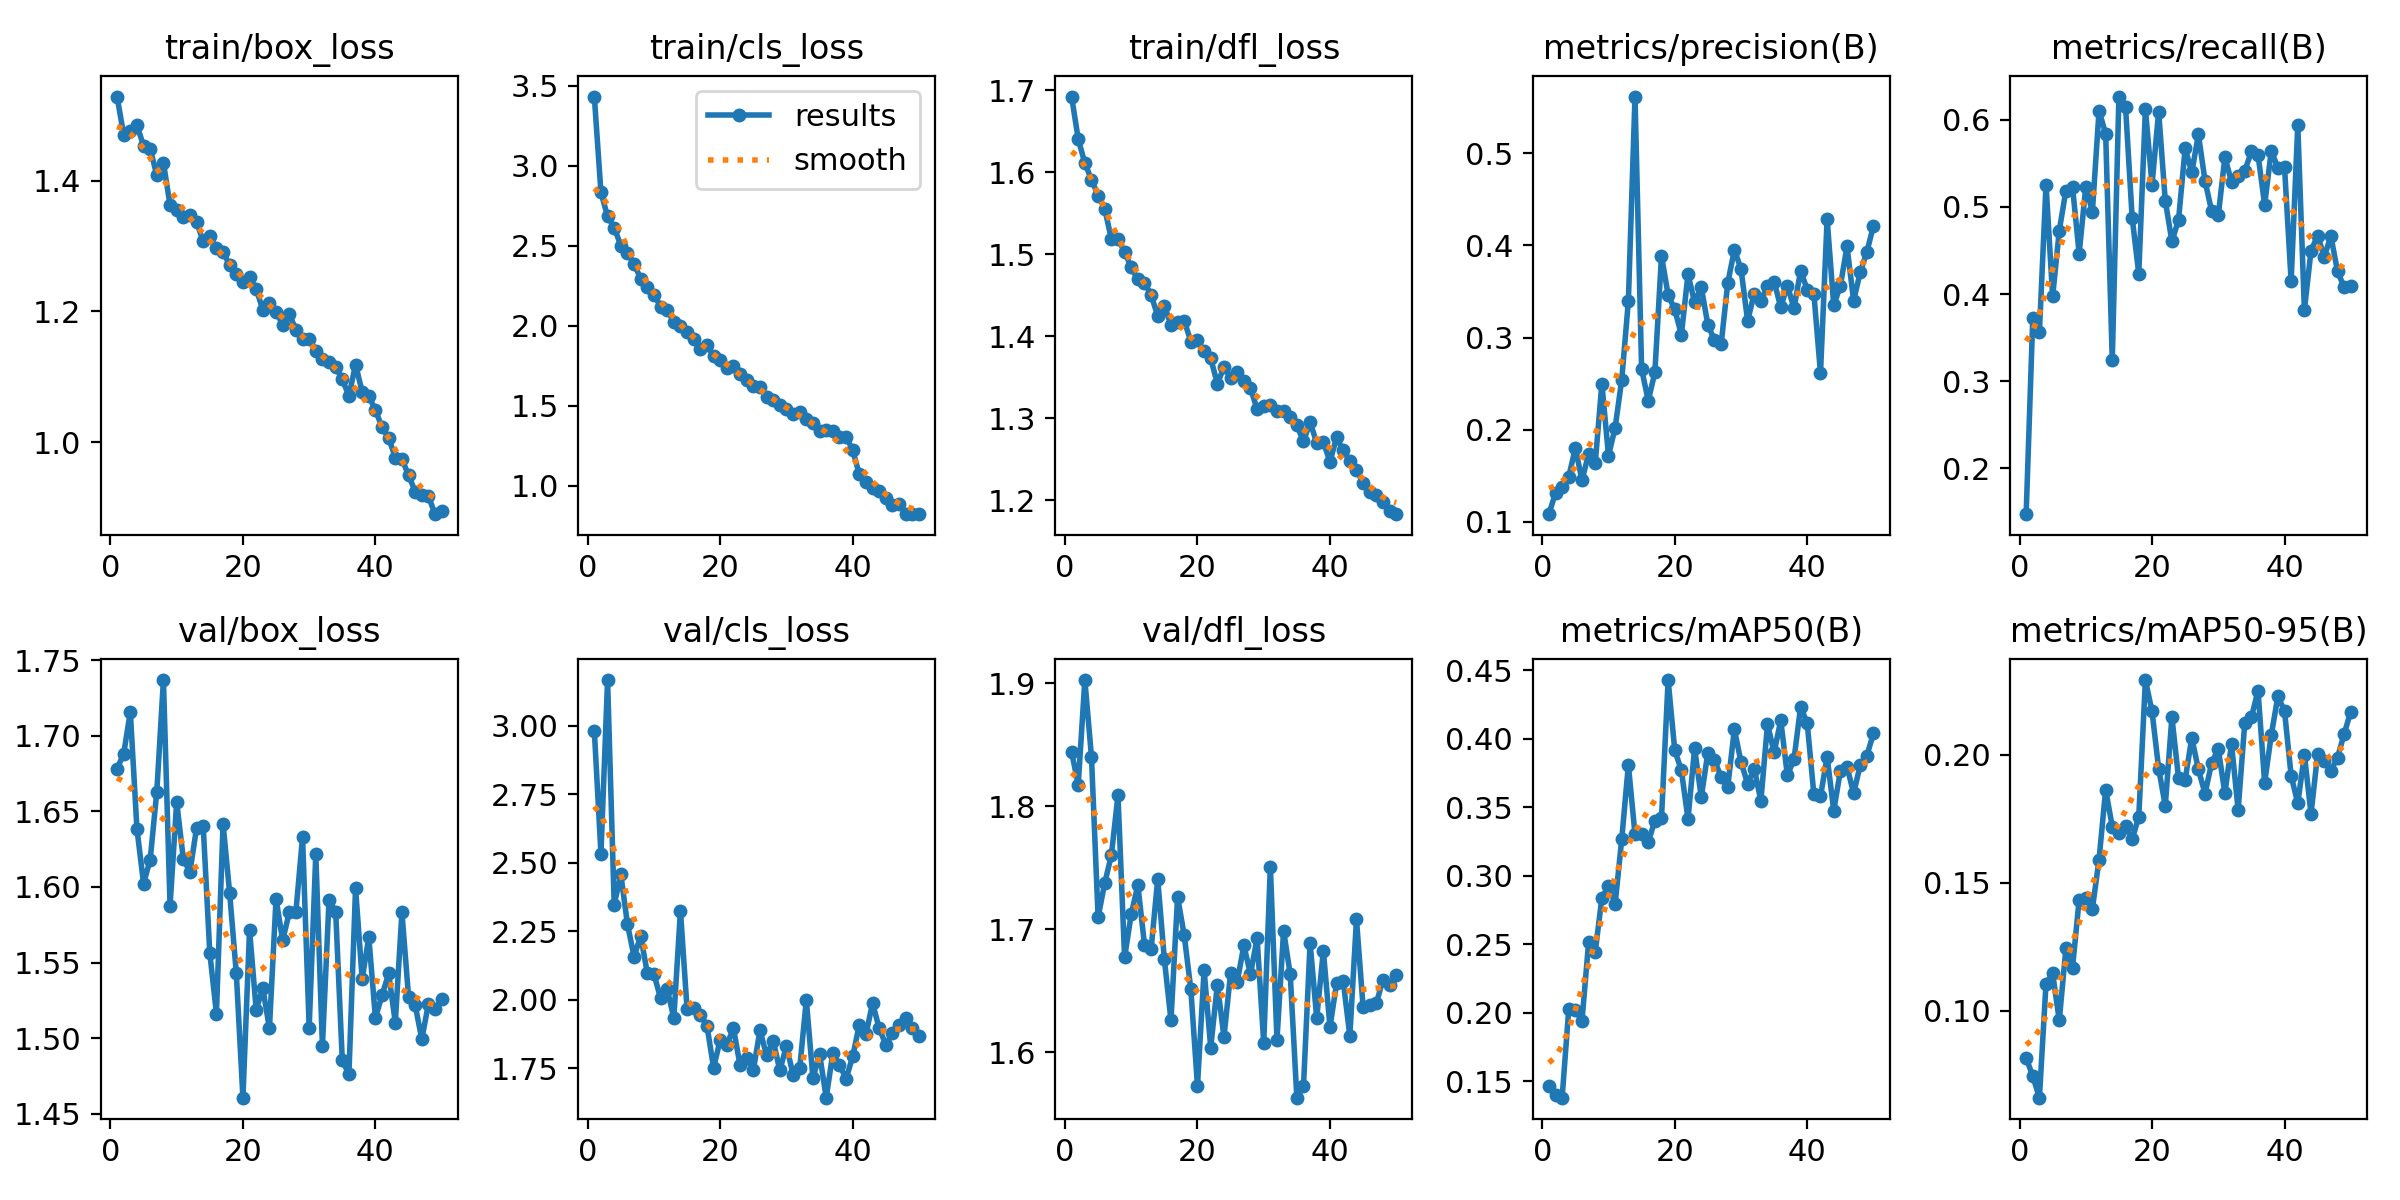

In [15]:
# Visualize training results
results_path = '/kaggle/working/runs/detect/yolov8_emotion_detection'
!ls {results_path}  # List files in the results directory

from IPython.display import Image
Image(filename=f"{results_path}/results.png")


In [12]:
import os

# List contents of the test directory
test_images_path = '/kaggle/input/emotion-dataset/test/images'
test_images = os.listdir(test_images_path)

# Display the first 10 files in the test directory
print("Test images:", test_images[:10])

# Check for label files
test_labels_path = '/kaggle/input/emotion-dataset/test/labels'
test_labels = os.listdir(test_labels_path)

print("Test labels:", test_labels[:10])


Test images: ['image_surprised_217_jpg.rf.ede8a76e00283bf003bd14af94f619f5.jpg', 'image_happy_50_jpg.rf.d28a19396662c0f63eb1c347f9754b01.jpg', 'image_surprised_282_jpg.rf.336e2f7cfed9c34eaa5eab777a50568d.jpg', 'image_scared_069_jpg.rf.6b239e73d9418fbaeff811a4dede5719.jpg', 'image_happy_73_jpg.rf.2e5efef9bec3f397d44a3602cb944eb6.jpg', 'image_happy_43_jpg.rf.9fd366e28e1744381b4013646533ddfc.jpg', 'image_disgusted_291_jpg.rf.1c42d5887995fc6b7ef5a836cf803c55.jpg', 'image_angry_239_jpg.rf.253d743f70ff779458e1d5a9a956de9e.jpg', 'image_happy_14_jpg.rf.8a2aa99af930c0b6686d8e6381a10dd5.jpg', 'image_angry_23_jpg.rf.e864904a428e58ec293aad5e3d86db38.jpg']
Test labels: ['image_happy_22_jpg.rf.b2ba22b1bcc3b27c725cb57018f5d0fe.txt', 'image_angry_243_jpg.rf.240d295a13c603ee6cc3772ece6cf021.txt', 'image_disgusted_291_jpg.rf.1c42d5887995fc6b7ef5a836cf803c55.txt', 'image_sad_040_jpg.rf.99e76531b4f9732071f8c7fb47fe59fe.txt', 'image_happy_73_jpg.rf.2e5efef9bec3f397d44a3602cb944eb6.txt', 'image_angry_219_jp

import cv2
import matplotlib.pyplot as plt
import os

# Define your class labels (emotions)
class_labels = ['happy', 'sad', 'angry', 'neutral']  # Replace with actual emotion names in your dataset

# Correct the path to point to the images subdirectory
test_images_path = '/kaggle/input/emotion-dataset/test/images'

# Load the best model from training
best_model = YOLO(f'{results_path}/weights/best.pt')

# Run inference on the test set
test_results = best_model.predict(source=test_images_path, save=True)

# Visualize predictions
for result in test_results:
    # Get the original image path from the result (or you can iterate over your own image paths)
    img_path = result.path
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(img_rgb)
    
    # Loop through the detections
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        cls = int(box.cls[0])  # Get the predicted class (emotion index)
        emotion = class_labels[cls]  # Get the emotion label
        
        # Draw bounding box
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none'))
        
        # Display the emotion label below the bounding box
        plt.text(x1, y2 + 20, emotion, color='blue', fontsize=12, backgroundcolor='white')

    plt.axis('off')  # Hide axis
    plt.show()
